In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.simplefilter("ignore")

from IPython import get_ipython

print('Imported')

Imported


In [2]:
fish_data = pd.read_csv('./fish.csv')
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [7]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
fish_data.shape

(159, 7)

In [9]:
fish_data.duplicated().sum()

0

In [10]:
fish_data.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [11]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

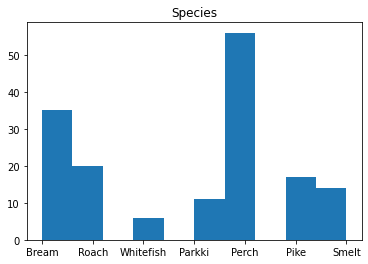

In [12]:
plt.hist(fish_data['Species'],bins=10)
plt.title('Species')
plt.show()

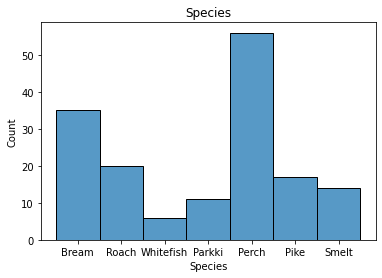

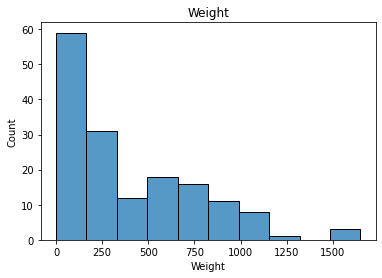

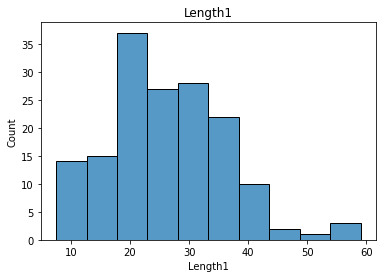

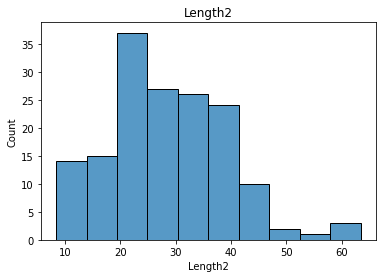

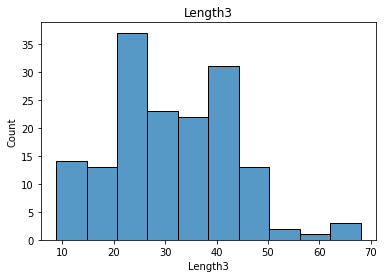

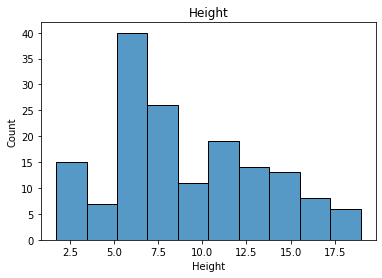

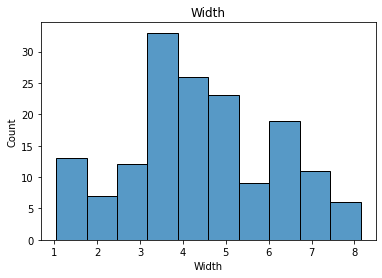

In [13]:
for i in fish_data.columns:
    sns.histplot(fish_data[i],bins=10)
    plt.title(i)
    plt.show()

In [14]:
# fig = px.histogram(fish_data, x='Species', color='Species')
# fig.show()

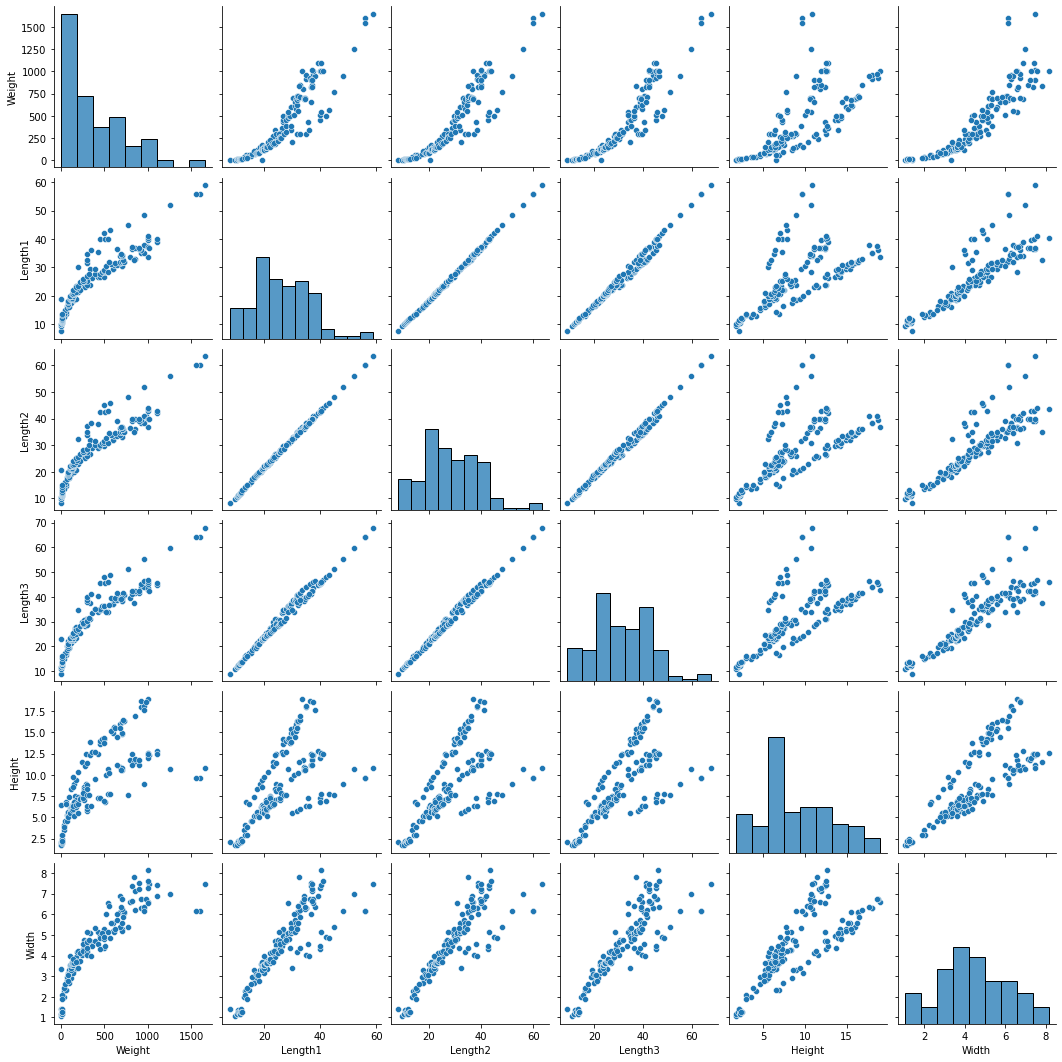

In [15]:
sns.pairplot(fish_data)

In [16]:
fish_data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


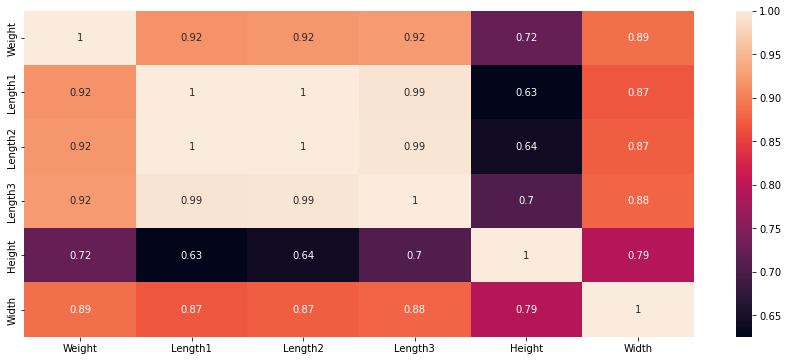

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(fish_data.corr(),annot=True)
plt.show()

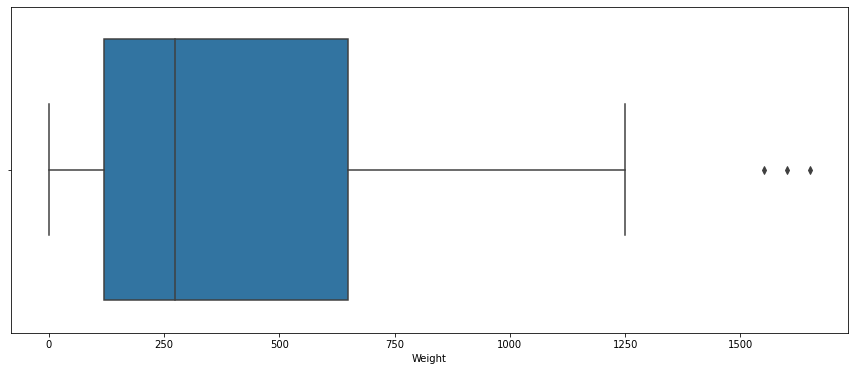

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Weight'])
plt.show()

In [19]:
fish_weight = fish_data['Weight']
Q3 = fish_weight.quantile(0.75)
Q1 = fish_weight.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [20]:
weight_outliers = fish_weight[(fish_weight < lower_limit) | (fish_weight > upper_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

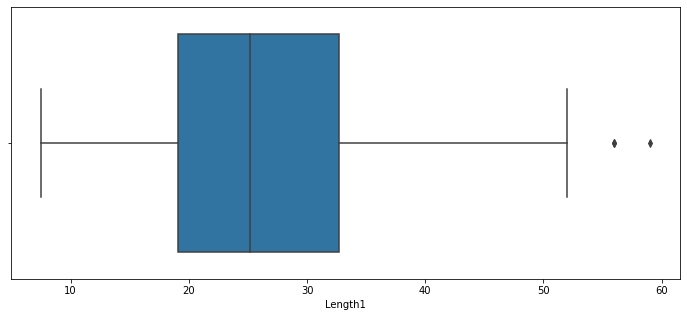

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(fish_data['Length1'])
plt.show()

In [22]:
fish_length1 = fish_data['Length1']
Q3 = fish_length1.quantile(0.75)
Q1 = fish_length1.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [23]:
length_outliers = fish_length1[(fish_length1 < lower_limit) | (fish_length1 > upper_limit)]
length_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

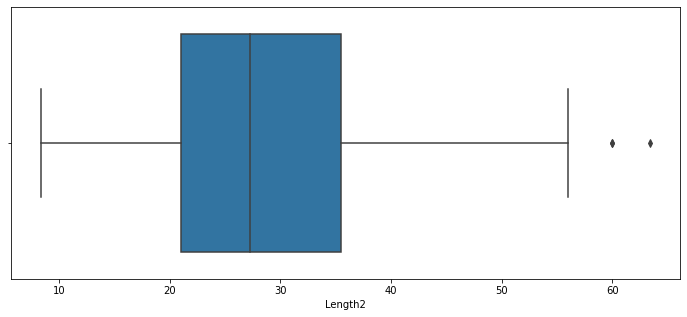

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(fish_data['Length2'])
plt.show()

In [25]:
fish_length2 = fish_data['Length2']
Q3 = fish_length2.quantile(0.75)
Q1 = fish_length2.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [26]:
length2_outliers = fish_length2[(fish_length2 < lower_limit) | (fish_length2 > upper_limit)]
length2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

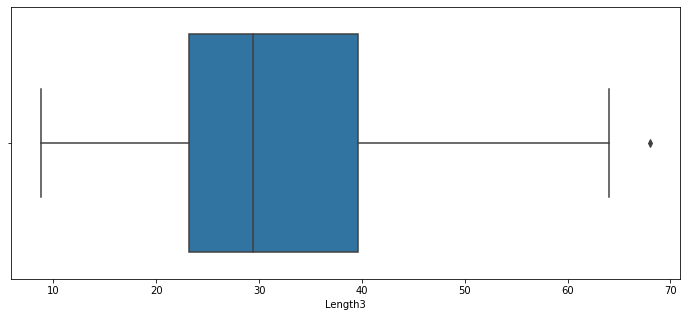

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(fish_data['Length3'])
plt.show()

In [28]:
fish_length3 = fish_data['Length3']
Q3 = fish_length3.quantile(0.75)
Q1 = fish_length3.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [29]:
length3_outliers = fish_length3[(fish_length3 < lower_limit) | (fish_length3 > upper_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

In [30]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

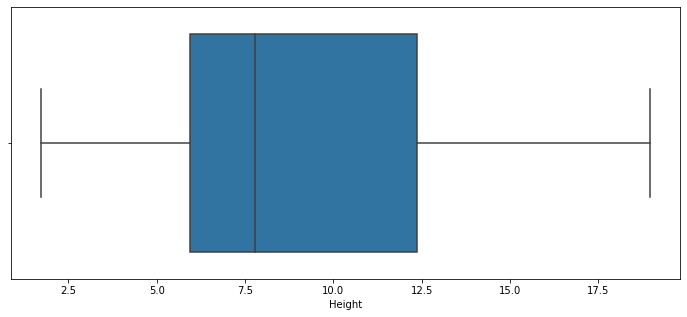

In [31]:
plt.figure(figsize=(12,5))
sns.boxplot(fish_data['Height'])
plt.show()

In [32]:
fish_height = fish_data['Height']
Q3 = fish_height.quantile(0.75)
Q1 = fish_height.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [33]:
height_outliers = fish_height[(fish_height < lower_limit) | (fish_height > upper_limit)]
height_outliers

Series([], Name: Height, dtype: float64)

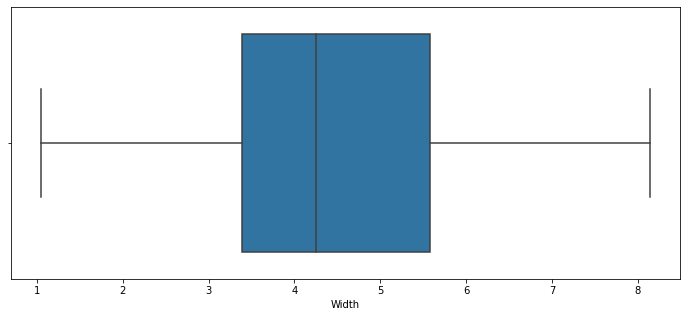

In [34]:
plt.figure(figsize=(12,5))
sns.boxplot(fish_data['Width'])
plt.show()

In [35]:
fish_width = fish_data['Width']
Q3 = fish_width.quantile(0.75)
Q1 = fish_width.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [36]:
fish_width = fish_width[(fish_width < lower_limit) | (fish_width > upper_limit)]
fish_width

Series([], Name: Width, dtype: float64)

In [37]:
fish_data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [38]:
fish_data_new = fish_data.drop([142,143,144])

In [39]:
fish_data_new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [40]:
fish_data_new.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [41]:
fish_data_new.shape

(156, 7)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaling_columns = ['Weight','Length1','Length2','Length3','Height','Width']
fish_data_new[scaling_columns] = scaler.fit_transform(fish_data_new[scaling_columns])
fish_data_new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,-5.693451e-17,1.281027e-17,-4.896368e-16,-2.049643e-16,1.366428e-16,1.480297e-16
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.177998e+00,-1.997257e+00,-1.986079e+00,-2.042126e+00,-1.675635e+00,-1.996688e+00
25%,-8.012570e-01,-7.321794e-01,-6.952556e-01,-7.078263e-01,-7.004973e-01,-6.036162e-01
50%,-3.271912e-01,-7.213903e-02,-1.061895e-01,-1.239237e-01,-3.023653e-01,-7.944425e-02
75%,7.449512e-01,7.116589e-01,7.389923e-01,8.304874e-01,7.951438e-01,6.291357e-01
max,2.746388e+00,2.898043e+00,2.890364e+00,2.732275e+00,2.321310e+00,2.259561e+00


In [45]:
data_cleaned = fish_data_new.drop("Weight",axis=1)
y = fish_data_new['Weight']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [47]:
# x_train,x_test,y_train,y_test=train_test_split(data_cleaned,y,test_size=0.33,random_state=42)

In [48]:
label_encoder = LabelEncoder()

In [49]:
data_cleaned['Species'] = label_encoder.fit_transform(data_cleaned['Species'])

In [50]:
x_train,x_test,y_train,y_test=train_test_split(data_cleaned,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.9950930728190399
Testing Accuracy: 0.9712230478779362


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
clf = LinearRegression()
clf.fit(x_train,y_train)

In [56]:
print("Training Accuracy:",clf.score(x_train,y_train))
print("Testing Accuracy:",clf.score(x_test,y_test))

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
trees = DecisionTreeRegressor()
trees.fit(x_train,y_train)

In [59]:
print("Training Accuracy:",trees.score(x_train,y_train))
print("Testing Accuracy:",trees.score(x_test,y_test))

In [60]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)
plt.show()

In [61]:
# from sklearn.linear_model import LogisticRegression
# log = LogisticRegression()

In [62]:
# log.fit(x_train,y_train)

In [63]:
import xgboost as xgb
xgb1 = xgb.XGBRegressor()

In [64]:
xgb1.fit(x_train,y_train)
xgb_pred = xgb1.predict(x_test)

In [65]:
print("Training Accuracy:",xgb1.score(x_train,y_train))
print("Testing Accuracy:",xgb1.score(x_test,y_test))

Training Accuracy: 0.9999980223435531
Testing Accuracy: 0.9645240323009929


In [66]:
xgb1.save_model("model.json")

In [67]:
import streamlit as st

In [68]:
st.header("Fish Weight Prediction App")
st.text_input("Enter your Name:",key="name")

2022-06-24 15:44:11.229 
  command:

    streamlit run C:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


''

In [69]:
np.save('classes.npy',label_encoder.classes_)

In [70]:
label_encoder.classes_ = np.load('classes.npy',allow_pickle=True)

In [71]:
xgb_best = xgb.XGBRegressor()

In [72]:
xgb_best.load_model("model.json")

In [73]:
if st.checkbox('Show training dataframe'):
    fish_data

In [74]:
st.subheader("Please select relevant features of your fish.")
left_column, righ_column = st.columns(2)
with left_column:
    inp_species = st.radio('Name of the fish:', np.unique(fish_data['Species']))

In [75]:
input_length1 = st.slider('Vertical length(cm)',0.0,max(fish_data["Length1"]),1.0)
input_length2 = st.slider('Diagonal length(cm)',0.0,max(fish_data["Length2"]),1.0)
input_length3 = st.slider('Cross length(cm)',0.0,max(fish_data["Length3"]),1.0)
input_height = st.slider('Height(cm)',0.0,max(fish_data["Height"]),1.0)
input_width = st.slider('Diagonal width(cm)',0.0,max(fish_data['Width']),1.0)

In [76]:
if st.button("Make Prediction"):
    input_species = label_encoder.transform(np.expand_dims(inp_species,-1))
    inputs = np.expand_dims(
        [int(input_species),input_length1,input_length2,input_length3,input_height,input_width],0)
    prediction = xgb_best.predict(inputs)
    print("Final pred",np.squeeze(prediction,-1))
    st.write(f"Your fish weight is: {np.squeeze(prediction,-1):.2f}g")